In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [2]:
data = pd.read_csv("HepatitisCdata.csv")
df = data.copy()
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [4]:
## Gereksiz olan Unnamed: 0 sütununun veriden çıkarılması
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.head()


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [6]:
df['Category'] = df['Category'].replace({
    '0=Blood Donor': 0, 
    '0s=suspect Blood Donor': 0, 
    '1=Hepatitis': 1, 
    '2=Fibrosis': 2, 
    '3=Cirrhosis': 3})

df['Sex'] = df['Sex'].replace({'m': 0, 'f': 1})

In [7]:
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [8]:
## Eksik Gözlemlerin ortalama ile doldurulması
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)

In [9]:
df.isnull().sum()


Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [10]:
df.head()


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [11]:
col=['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X = df.drop("Category", axis=1)
y = df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
model_accuracy=[]

## CNN

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Modeli güncelle
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Genişletilmiş Giriş katmanı
    Dropout(0.3),
    Dense(64, activation='relu'),  # Genişletilmiş Gizli katman
    Dropout(0.3),
    Dense(64, activation='relu'),  # Yeni Gizli katman
    Dropout(0.3),
    Dense(32, activation='relu'),  # Yeni Gizli katman
    Dropout(0.3),
    Dense(16, activation='relu'),  # Gizli katman
    Dropout(0.3),
    Dense(4, activation='softmax')  # Çıkış katmanı, 4 sınıf için softmax
])

# Modeli derle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğit
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Model değerlendirmesi
loss, accuracy = model.evaluate(X_test, y_test)
model_accuracy.append(accuracy)
print(f'Test Accuracy: {accuracy*100:.2f}%')






Epoch 1/50


/Users/resit/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1796 - loss: 19.0223 - val_accuracy: 0.8953 - val_loss: 0.8174
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3980 - loss: 6.2387 - val_accuracy: 0.8953 - val_loss: 0.7288
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6266 - loss: 3.2918 - val_accuracy: 0.8953 - val_loss: 0.5730
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6539 - loss: 2.5698 - val_accuracy: 0.8953 - val_loss: 0.4799
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7165 - loss: 1.7863 - val_accuracy: 0.8953 - val_loss: 0.4156
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7416 - loss: 2.3011 - val_accuracy: 0.8953 - val_loss: 0.3971
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6916 - loss: 1.6022 - val_accuracy: 0.9070 - val_loss: 0.3833
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6661 - loss: 1.3831 - val_accuracy: 0.8953 - val_loss: 0.3610
Ep

In [15]:
from tensorflow.keras.models import Model
# Öznitelik çıkarma modelini oluştur
text_feature_extraction_model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

# Eğitim ve test verilerinden öznitelikleri çıkar
text_features_train = text_feature_extraction_model.predict(X_train)
text_features_test = text_feature_extraction_model.predict(X_test)

# Öznitelik çıkarma sonucunu kontrol etmek için boyutları yazdırma
print("Eğitim verisi öznitelik boyutu:", text_features_train.shape)
print("Test verisi öznitelik boyutu:", text_features_test.shape)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
Eğitim verisi öznitelik boyutu: (430, 16)
Test verisi öznitelik boyutu: (185, 16)


# SVM

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# SVM modelini oluşturma
# SVC, varsayılan olarak RBF kernelini kullanır
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))

# Modeli eğitme
svm_model.fit(text_features_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = svm_model.predict(text_features_test)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
model_accuracy.append(accuracy)
print(f'Accuracy: {accuracy*100:.2f}%')

# Ayrıntılı sınıflandırma raporu
print(classification_report(y_test, y_pred))


Accuracy: 87.57%
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       156
           1       0.33      0.10      0.15        10
           2       0.50      0.12      0.20         8
           3       1.00      0.45      0.62        11

    accuracy                           0.88       185
   macro avg       0.68      0.42      0.48       185
weighted avg       0.85      0.88      0.84       185



# KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# KNN modelini oluşturma
# n_neighbors parametresi komşu sayısını belirler, varsayılan değer 5'tir.
knn_model = Pipeline([
    ('scaler', StandardScaler()),  # Özellik ölçeklendirme
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Modeli eğitme
knn_model.fit(text_features_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = knn_model.predict(text_features_test)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
model_accuracy.append(accuracy)
print(f'Accuracy: {accuracy*100:.2f}%')

# Ayrıntılı sınıflandırma raporu
print(classification_report(y_test, y_pred))







Accuracy: 87.57%
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       156
           1       0.43      0.30      0.35        10
           2       0.20      0.12      0.15         8
           3       1.00      0.45      0.62        11

    accuracy                           0.88       185
   macro avg       0.63      0.47      0.52       185
weighted avg       0.86      0.88      0.86       185



# NB

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Naive Bayes modelini oluşturma
nb_model = Pipeline([
    ('scaler', StandardScaler()),  # Özellik ölçeklendirme
    ('nb', GaussianNB())  # Gaussian Naive Bayes sınıflandırıcısı
])

# Modeli eğitme
nb_model.fit(text_features_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = nb_model.predict(text_features_test)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
model_accuracy.append(accuracy)
print(f'Accuracy: {accuracy*100:.2f}%')

# Ayrıntılı sınıflandırma raporu
print(classification_report(y_test, y_pred))


Accuracy: 77.84%
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       156
           1       0.09      0.10      0.10        10
           2       0.17      0.62      0.26         8
           3       0.67      0.36      0.47        11

    accuracy                           0.78       185
   macro avg       0.47      0.49      0.44       185
weighted avg       0.87      0.78      0.81       185



# LDA

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# LDA modelini oluşturma
lda_model = Pipeline([
    ('scaler', StandardScaler()),  # Özellik ölçeklendirme
    ('lda', LinearDiscriminantAnalysis())  # LDA sınıflandırıcısı
])

# Modeli eğitme
lda_model.fit(text_features_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = lda_model.predict(text_features_test)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
model_accuracy.append(accuracy)
print(f'Accuracy: {accuracy*100:.2f}%')

# Ayrıntılı sınıflandırma raporu
print(classification_report(y_test, y_pred))


Accuracy: 88.11%
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       156
           1       0.37      0.70      0.48        10
           2       0.33      0.25      0.29         8
           3       1.00      0.36      0.53        11

    accuracy                           0.88       185
   macro avg       0.67      0.57      0.57       185
weighted avg       0.90      0.88      0.88       185



# DT

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Karar Ağacı modelini oluşturma
dt_model = Pipeline([
    ('scaler', StandardScaler()),  # Özellik ölçeklendirme
    ('dt', DecisionTreeClassifier(random_state=42))  # Karar Ağacı sınıflandırıcısı
])

# Modeli eğitme
dt_model.fit(text_features_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = dt_model.predict(text_features_test)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
model_accuracy.append(accuracy)
print(f'Accuracy: {accuracy*100:.2f}%')

# Ayrıntılı sınıflandırma raporu
print(classification_report(y_test, y_pred))


Accuracy: 85.95%
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       156
           1       0.50      0.20      0.29        10
           2       0.25      0.38      0.30         8
           3       0.43      0.27      0.33        11

    accuracy                           0.86       185
   macro avg       0.53      0.45      0.47       185
weighted avg       0.85      0.86      0.85       185



# LR

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Lineer Regresyon modelini oluşturma
lr_model = Pipeline([
    ('scaler', StandardScaler()),  # Özellik ölçeklendirme
    ('lr', LinearRegression())  # Lineer Regresyon sınıflandırıcısı
])

# Modeli eğitme
lr_model.fit(text_features_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = lr_model.predict(text_features_test)

# Modelin performansını değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_accuracy.append(r2)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')



Mean Squared Error: 0.47
R-squared: 0.29


In [22]:
model_name=['CNN','SVM','KNN','NB','LDA','DT','LR']
model_accuracy
df = pd.DataFrame({'Model': model_name, 'Accuracy': model_accuracy})
df


,Model,Accuracy
0,CNN,0.854054
1,SVM,0.875676
2,KNN,0.875676
3,NB,0.778378
4,LDA,0.881081
5,DT,0.859459
6,LR,0.293334


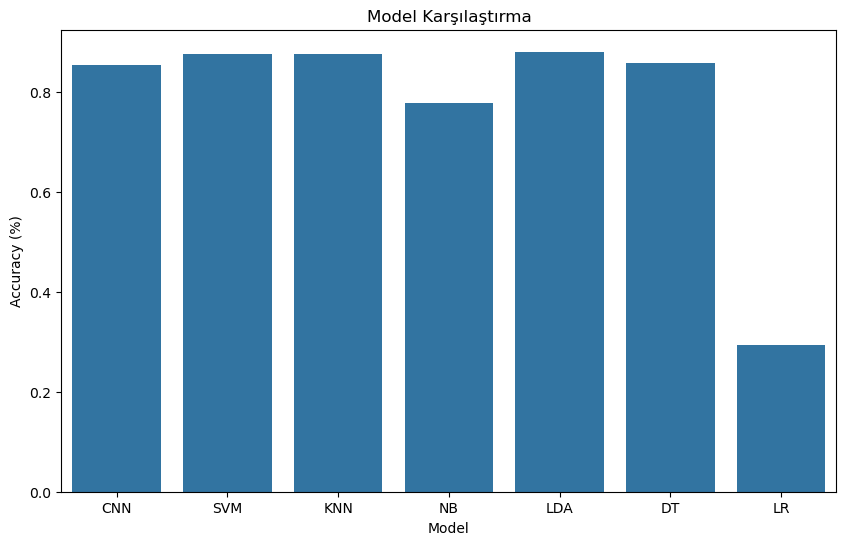

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik boyutunu ayarlama
plt.figure(figsize=(10, 6))

# Seaborn barplot kullanarak görselleştirme
sns.barplot(x='Model', y='Accuracy', data=df)

# Başlık ve eksen etiketlerini ayarlama
plt.title('Model Karşılaştırma')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')

# Grafiği gösterme
plt.show()
